<a href="https://colab.research.google.com/github/Kravty/MachineLearning/blob/main/TensorFlow_Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%tensorflow_version 2.x

In [ ]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam
from matplotlib import pyplot as plt
import numpy as np
import random

In [ ]:
img_rows, img_cols = 28, 28
batch_size = 128
num_classes = 10
epochs = 30
dropout = 0.75

In [ ]:
from tensorflow.keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


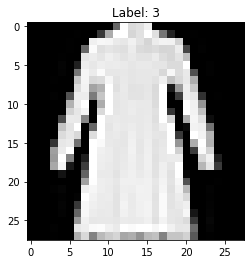

In [ ]:
# Save of original test images for display purposes
orig_test = x_test

index = random.randrange(1000)
plt.imshow(orig_test[index], cmap='gray')
plt.title(f'Label: {y_test[index]}')
plt.show()

In [ ]:
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    
x_train, x_test = x_train / 255.0, x_test / 255.0

print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

60000 train samples
10000 test samples


In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(dropout/2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(dropout))
model.add(Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

Epoch 1/30
469/469 [==============================] - 4s 8ms/step - loss: 0.7138 - accuracy: 0.7483 - val_loss: 0.3826 - val_accuracy: 0.8600
Epoch 2/30
469/469 [==============================] - 3s 7ms/step - loss: 0.4840 - accuracy: 0.8304 - val_loss: 0.3269 - val_accuracy: 0.8812
Epoch 3/30
469/469 [==============================] - 3s 7ms/step - loss: 0.4251 - accuracy: 0.8496 - val_loss: 0.3077 - val_accuracy: 0.8894
Epoch 4/30
469/469 [==============================] - 3s 7ms/step - loss: 0.3888 - accuracy: 0.8616 - val_loss: 0.2737 - val_accuracy: 0.9018
Epoch 5/30
469/469 [==============================] - 3s 7ms/step - loss: 0.3583 - accuracy: 0.8714 - val_loss: 0.2618 - val_accuracy: 0.9063
Epoch 6/30
469/469 [==============================] - 3s 7ms/step - loss: 0.3368 - accuracy: 0.8783 - val_loss: 0.2549 - val_accuracy: 0.9058
Epoch 7/30
469/469 [==============================] - 4s 7ms/step - loss: 0.3199 - accuracy: 0.8834 - val_loss: 0.2510 - val_accuracy: 0.9097
Epoch 

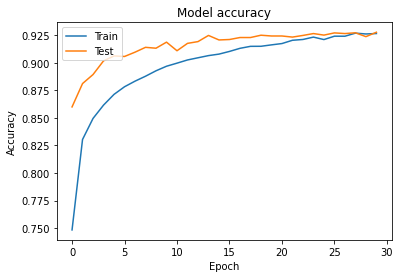

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

# Train model for a given number of epochs
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_test, y_test))

# Evaluate model against test data
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
predictions = model.predict(x_test)
most_likely = predictions.argmax(1)

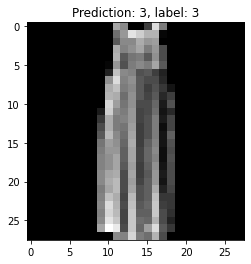

In [ ]:
index = random.randrange(10000)
plt.title(f'Prediction: {most_likely[index]}, label: {y_test[index]}')
plt.imshow(orig_test[index], cmap='gray')
plt.show()

Description of labels:
*   0 T-shirt/top
*   1 Trouser
*   2 Pullover
*   3 Dress
*   4 Coat
*   5 Sandal
*   6 Shirt
*   7 Sneaker
*   8 Bag
*   9 Ankle boot

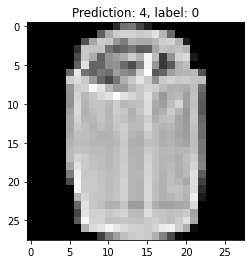

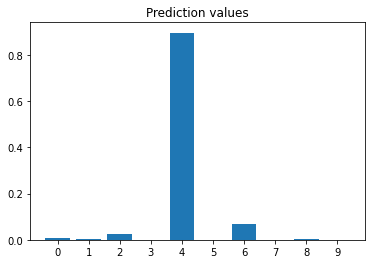

In [ ]:
for i in range(10000):
    index = random.randrange(10000)
    if most_likely[index] != y_test[index]:
        break

plt.imshow(orig_test[index], cmap='gray')
plt.title(f'Prediction: {most_likely[index]}, label: {y_test[index]}')
plt.show()

plt.bar(range(10), predictions[index], tick_label=range(10))
plt.title('Prediction values')
plt.show()